<a href="https://colab.research.google.com/github/abelowska/eegML/blob/main/Classes_02_multiple_variables_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple variable linear regression

Using an open source [diabetes dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes) we're going to predict diabetes progression based on BMI scores with linear regression but now using more than one predictor. 

Imports

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import io
import plotly.graph_objects as go

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## Load the [diabetes dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes)

In [4]:
diabets_data = datasets.load_diabetes(as_frame=True)

Inspect the data

In [5]:
# read the description of dataset: the target and features
print(diabets_data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [6]:
# get dataframe consisting of features (X set)
diabetes_X_df = diabets_data.data
diabetes_X_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [7]:
# checking for Null Values
diabetes_X_df.isnull().sum()

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

In [8]:
diabetes_X_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


In [9]:
# get dataframe with target (y set)
diabetes_y_df = diabets_data.target
diabetes_y_df.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

In [10]:
# checking for Null Values
diabetes_y_df.isnull().sum()

0

In [11]:
diabetes_y_df.describe()

count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: target, dtype: float64

Notice, that X dataset is a `DataFrame` that consists of 10 columns (10 features) and y dataset is a `Series`. If you do not know how I knew where the data was and what parameters to refer to - look at the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes) :)

Now, let's look deeper inside the data:

In [12]:
# merge target and features into one dataframe
df = pd.DataFrame(diabetes_y_df).join(diabetes_X_df)
df.head()

,target,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,151.0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,75.0,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,141.0,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,206.0,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,135.0,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [13]:
# create correlation matix
corr = df.corr()

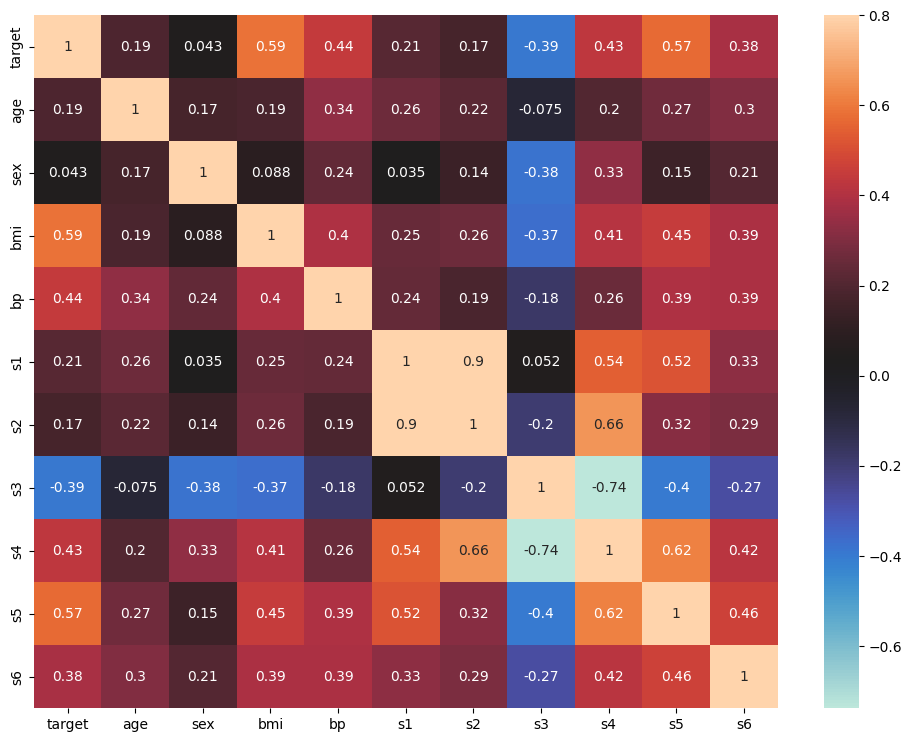

In [14]:
# plot matrix
plt.figure(figsize=(12,9))

sns.heatmap(
    corr,
    vmax=.8, 
    annot=True,
    cmap='icefire'
    )

plt.show()


**Now, we're going to add more features to our $\color{#DF3B18}{\text{feature vector}}$. Let's look whether adding $\color{#DF3B18}{\text{total cholesterol (s4)}}$ variable to $\color{#DF3B18}{\text{BMI}}$ increases accuracy of our predictive model.**



## Prepare data

Select features from a data frame consisting of features. Then, cast data to array-like data format and reshape to (n_samples, n_features).

In [15]:
# view df
diabetes_X_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [16]:
# select bmi and s4 colums, transform to np.array and reshape to (n_samples, n_features)
# now we have the so-called vector of features 
X = diabetes_X_df[["bmi", "s4"]].to_numpy().reshape(-1, 2)
print(X.shape)

(442, 2)


In [17]:
# transform target set to np.array and ensure the shape (n_samples)
y = diabetes_y_df.to_numpy()
print(y.shape)

(442,)


### Train-test split

In [18]:
# to ensure repeatability of splits, we set the random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
print(f"Shape of the X train dataset: {X_train.shape}")
print(f"Shape of the X test dataset: {X_test.shape}")
print(f"Shape of the y train dataset: {y_train.shape}")
print(f"Shape of the y test dataset: {y_test.shape}")

Shape of the X train dataset: (353, 2)
Shape of the X test dataset: (89, 2)
Shape of the y train dataset: (353,)
Shape of the y test dataset: (89,)


## Fit the model

In [20]:
# create model object
lin_regressor = linear_model.LinearRegression()
lin_regressor

LinearRegression()

In [21]:
lin_regressor.fit(X_train, y_train)

LinearRegression()

## Test model

Predict progression of diabetes based on unseen BMI and cholesterol measurements observations from the test sets with [`predict()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict) method:

In [22]:
diabetes_y_pred = lin_regressor.predict(X_test)

Calculate $R^2$, $MAE$ and $MSE$

In [23]:
# The coefficient of determination: 1 is perfect prediction
print(f"Coefficient of determination: {r2_score(y_test, diabetes_y_pred)}")

Coefficient of determination: 0.31774842514376833


In [24]:
# The mean absolute error
print(f"Mean absolute error: {mean_absolute_error(y_test, diabetes_y_pred)}")

Mean absolute error: 48.611188894928354


In [25]:
# The mean squared error
print(f"Mean squared error: {mean_squared_error(y_test, diabetes_y_pred)}")

Mean squared error: 3614.6723742527483


It's impossible to interpret $MAE$ and $MSE$ scores standalone. As they reflect the units of data being analysed, we can check mean and standard deviation of target data, to compare $MAE$ and $MSE$ scores with properties of target set.

In [26]:
print(f"Mean progression of diabets: {np.mean(diabetes_y_pred)}")
print(f"One standard deviation of progression of diabets: {np.std(diabetes_y_pred)}")
print(f"Squared standard deviation of progression of diabets: {np.std(diabetes_y_pred)**2}")

Mean progression of diabets: 145.75100136464567
One standard deviation of progression of diabets: 48.893707215464815
Squared standard deviation of progression of diabets: 2390.5946052715963


Quite clearly, our model is better at predicting diabetes progression - all of our metrics are better compared to a simple linear regression.

* $R^2$ increase from $23\%$ to $32\%$, 
* $MAE$ droped from $52$ to $48$, so now it is within $1$ $STD$.

## Plot results

Put data into df. Mind, that our feature vector now has 2 variables: bmi and cholesterol level. We're going to split those joined observations into separate colums.

In [95]:
prediction_results_df = pd.DataFrame({ 
    "X_bmi": X_test[:,0],
    "X_cholesterol": X_test[:,1],
    "y_real": y_test,
    "y_pred": diabetes_y_pred,   
})

prediction_results_df.head()

NameError: name 'diabetes_y_pred' is not defined

Plot predicted vs real data.

3D plotting doesn't have to bo so complicated as coded below - nonetheless Google Colab does not support interactive `matplotlib` (and therefore `seaborn`) plots. Thus, 3D plot below is generated using [`plotly`](https://plotly.com/python/) library.


In [30]:
# create scatter plot with observed data

trace1 = go.Scatter3d(x=prediction_results_df['X_bmi'].to_numpy(), 
                      y=prediction_results_df['X_cholesterol'].to_numpy(), 
                      z=prediction_results_df['y_real'].to_numpy(),
                      mode='markers',
                      marker=dict(
                          size=12,
                          color=['pink']*len(prediction_results_df['X_bmi'].to_numpy()),                # set color to an array/list of desired values
                      ),
                      name = "Observed data"
                      )

# create surface plot with predicted data
trace2 = go.Mesh3d(x=prediction_results_df['X_bmi'].to_numpy(), 
                      y=prediction_results_df['X_cholesterol'].to_numpy(), 
                      z=prediction_results_df['y_pred'].to_numpy(),
                      opacity = 0.8,
                      color='purple' ,
                      name="Regression line"
                      )

# add plots to figure to be drawn
fig = go.Figure(data=[
        trace1,
        trace2])

# change axes labels
fig.update_layout(
    scene = dict(
        xaxis_title='BMI',
        yaxis_title='Cholesterol',
        zaxis_title='Diabetes Progression')
)

# plot figure
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

# Adjusted $R^2$

## Let's test few more relationships

In [31]:
# slice subset of data
diabetes_y_df = diabets_data.target
diabetes_y_df.shape

y = diabetes_y_df.to_numpy()
print(y.shape)

(442,)


In [32]:
# prepare dataframe for results
results_df = pd.DataFrame()

In [33]:
# Diabetes progression = s2
X = diabetes_X_df[["s2"]].to_numpy().reshape(-1, 1)
print(X.shape)

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create model object
lin_regressor = linear_model.LinearRegression()

# fit the model
lin_regressor.fit(X_train, y_train)

# predict 
diabetes_y_pred = lin_regressor.predict(X_test)

# calculate metrics
r2 = r2_score(y_test, diabetes_y_pred)
mae = mean_absolute_error(y_test, diabetes_y_pred)
mse = mean_squared_error(y_test, diabetes_y_pred)
print(f"Coefficient of determination: {r2}") 
print(f"Mean absolute error: {mae}")
print(f"Mean squared error: {mse}")

# save results to df
this_results = pd.DataFrame({
    "model": "S2",
    "R2": [r2],
    "MAE": [mae],
    "MSE": [mse],  
})

results_df = results_df.append(this_results)

(442, 1)
Coefficient of determination: 0.044947934833481695
Mean absolute error: 61.64742416472253
Mean squared error: 5060.010768986381


C:\Users\User\AppData\Local\Temp\ipykernel_75396\2429007793.py:33: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [34]:
results_df

,model,R2,MAE,MSE
0,S2,0.044948,61.647424,5060.010769


In [35]:
# Diabetes progression = s2 + age

X = diabetes_X_df[["s2", "age"]].to_numpy().reshape(-1, 2)
print(X.shape)

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create model object
lin_regressor = linear_model.LinearRegression()

# fit the model
lin_regressor.fit(X_train, y_train)

# predict 
diabetes_y_pred = lin_regressor.predict(X_test)

# calculate metrics
r2 = r2_score(y_test, diabetes_y_pred)
mae = mean_absolute_error(y_test, diabetes_y_pred)
mse = mean_squared_error(y_test, diabetes_y_pred)
print(f"Coefficient of determination: {r2}") 
print(f"Mean absolute error: {mae}")
print(f"Mean squared error: {mse}")

# save results to df
this_results = pd.DataFrame({
    "model": "s2+AGE",
    "R2": [r2],
    "MAE": [mae],
    "MSE": [mse],  
})

results_df = results_df.append(this_results)

(442, 2)
Coefficient of determination: 0.04891586770572709
Mean absolute error: 61.49264192815145
Mean squared error: 5038.988058501297


C:\Users\User\AppData\Local\Temp\ipykernel_75396\4217129834.py:34: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [36]:
results_df

,model,R2,MAE,MSE
0,S2,0.044948,61.647424,5060.010769
0,s2+AGE,0.048916,61.492642,5038.988059


In [ ]:
# Diabetes progression = s2 + age + s1

X = diabetes_X_df[["s2", "age", "s1"]].to_numpy().reshape(-1, 3)
print(X.shape)

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create model object
lin_regressor = linear_model.LinearRegression()

# fit the model
lin_regressor.fit(X_train, y_train)

# predict 
diabetes_y_pred = lin_regressor.predict(X_test)

# calculate metrics
r2 = r2_score(y_test, diabetes_y_pred)
mae = mean_absolute_error(y_test, diabetes_y_pred)
mse = mean_squared_error(y_test, diabetes_y_pred)
print(f"Coefficient of determination: {r2}") 
print(f"Mean absolute error: {mae}")
print(f"Mean squared error: {mse}")

# save results to df
this_results = pd.DataFrame({
    "model": "s2+AGE+s1",
    "R2": [r2],
    "MAE": [mae],
    "MSE": [mse],  
})

results_df = results_df.append(this_results)

(442, 3)
Coefficient of determination: 0.05714032344101483
Mean absolute error: 60.903219597464854
Mean squared error: 4995.413643966785


In [37]:
results_df

,model,R2,MAE,MSE
0,S2,0.044948,61.647424,5060.010769
0,s2+AGE,0.048916,61.492642,5038.988059


In [ ]:
# Diabetes progression = s2 + age + s1 + random

# create some random data
random_data = np.random.rand(442)
random_data = random_data.reshape(-1,1)

# add random data to feature vector
X = diabetes_X_df[["s2", "age", "s1"]].to_numpy()
X = np.concatenate((X, random_data), axis=1)

X.reshape(-1, 4)
print(X.shape)

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# create model object
lin_regressor = linear_model.LinearRegression()

# fit the model
lin_regressor.fit(X_train, y_train)

# predict 
diabetes_y_pred = lin_regressor.predict(X_test)

# calculate metrics
r2 = r2_score(y_test, diabetes_y_pred)
mae = mean_absolute_error(y_test, diabetes_y_pred)
mse = mean_squared_error(y_test, diabetes_y_pred)
print(f"Coefficient of determination: {r2}") 
print(f"Mean absolute error: {mae}")
print(f"Mean squared error: {mse}")

# save results to df
this_results = pd.DataFrame({
    "model": "s2+AGE+s1+rand",
    "R2": [r2],
    "MAE": [mae],
    "MSE": [mse],  
})

results_df = results_df.append(this_results)

(442, 4)
Coefficient of determination: 0.04663087042547276
Mean absolute error: 61.369077063624346
Mean squared error: 5051.094320837032


In [38]:
results_df

,model,R2,MAE,MSE
0,S2,0.044948,61.647424,5060.010769
0,s2+AGE,0.048916,61.492642,5038.988059


Seem good! Our accuracy increases while we add more features to feature vector.

**However...**

$R^2$ tends to increase with every predictor added to a model. As $R^2$ always increases and never decreases, it can appear to be a better fit with the more terms you add to the model. This can be completely misleading.

Adjusted $R^2$ is a modified version of $R^2$ that has been adjusted for the number of predictors in the model. The adjusted $R^2$ increases when the new term improves the model more than would be expected by chance. It decreases when a predictor improves the model by less than expected. The adjusted $R^2$ is always lower than the $R^2$.

The equation for Adjusted $R^2$ is as follows:


$$
Adj\_R^2 = 1 - {(1 - R^2)(n - 1) \over (n - k -1)}
$$

where: 
* $n$ is a data length
* $k$ is a number of predictors

In [39]:
# function for calculating adjusted R2
def adj_r2(num_predictors, data_length, r2):
  return (1 - (((1-r2)*(data_length-1))/(data_length - num_predictors - 1)))

In [40]:
# apply function adj_r2 to each record of results dataframe

data_length = len(y_test)

results_df['adj_R2'] = results_df.apply(
    lambda row: adj_r2(
                  len(row["model"].split("+")),
                  data_length,
                  row.R2
                ), 
                axis = 1)

In [41]:
results_df

,model,R2,MAE,MSE,adj_R2
0,S2,0.044948,61.647424,5060.010769,0.033970
0,s2+AGE,0.048916,61.492642,5038.988059,0.026798


---
Note, however, that $R^2_{Adj}$ is only a certain statistical approximation, useful in some situations and less so in others. 

In [44]:
def plotR2againstAdjustedR2(r2, start_sample_size=30, stop_sample_size = 1000, n_features=2):
  adj_r2 = []

  adj_r2_start = 1 - (1-r2)*(start_sample_size-1)/(start_sample_size - n_features -1)

  sample_sizes = range(start_sample_size, stop_sample_size, 20)
  # calculate adjusted R2 for increasing sample sizes
  for item in sample_sizes:
    current_adj_r2 = 1 - (1-r2)*(item-1)/(item - n_features -1)
    adj_r2 = np.append(adj_r2, current_adj_r2)

  # plot results
  fig, ax = plt.subplots(figsize=(10,5))

  adj_ax = plt.scatter(sample_sizes, adj_r2, c="r", alpha=0.5, label='Adj. R2')
  plt.plot(sample_sizes, adj_r2, c="r", alpha=0.5)
  
  r_ax = plt.axhline(y=r2, color='g', linestyle='-', label='R2')
  adj_h_ax = plt.axhline(y=adj_r2_start, color='r', alpha=0.9, linestyle='-', label='Adj. R2 start')

  # add legends and axes labels
  plt.xlabel("Sample Size")
  plt.ylabel("Scores")
  ax.legend(handles=[adj_ax, r_ax, adj_h_ax])

In [45]:
@widgets.interact(R2=(0, 1, 0.01), Features =(1, 28, 1))
def update(R2 = 0.01, Features=1):
    plotR2againstAdjustedR2(r2 = R2, n_features=Features)

# Exercise

# Life Expectancy with Multivariate Linear Regression

*   Download [Life Expectancy Data](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who) from Kaggle. After downloading it should be .zip dir that consists of `Live Expectancy Data.csv` file.
*   Read the data using code below.
*   Predict a choosen variable on the basis of 2-3 other variables.


## Load the Life Expectancy Dataset

In [9]:
# To upload from your local drive, start with the following code. 
# It will prompt you to select a file. Click on “Choose Files” 
# then select and upload the .csv file you downloaded. 

#from google.colab import files
#uploaded = files.upload()

In [10]:
# make sure the filename matches the name of the uploaded file 
life_expectancy_data = pd.read_csv("life_expectancy_data.csv")
life_expectancy_df = life_expectancy_data.copy()

### Inspect data

In [61]:
life_expectancy_df.head()

,Country,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,...,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [77]:
life_expectancy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 2937
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          1649 non-null   int64  
 1   Lifeexpectancy                1649 non-null   float64
 2   AdultMortality                1649 non-null   float64
 3   infantdeaths                  1649 non-null   int64  
 4   Alcohol                       1649 non-null   float64
 5   percentageexpenditure         1649 non-null   float64
 6   HepatitisB                    1649 non-null   float64
 7   Measles                       1649 non-null   int64  
 8   BMI                           1649 non-null   float64
 9   under-fivedeaths              1649 non-null   int64  
 10  Polio                         1649 non-null   float64
 11  Totalexpenditure              1649 non-null   float64
 12  Diphtheria                    1649 non-null   float64
 13  HIV

In [55]:
#Remove unnecessary spaces
life_expectancy_df.columns = life_expectancy_df.columns.str.replace(' ', '')

In [76]:
#pd.to_numeric(life_expectancy_df["Country"], errors='coerce')
#life_expectancy_df["Country"] = life_expectancy_df["Country"].astype(float)

#usunięcie kolumn z danymi jakościowymi
#del life_expectancy_df['Country']
#del life_expectancy_df['Status']

ValueError: could not convert string to float: 'Afghanistan'

In [97]:
life_expectancy_df.describe()

,Year,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000
mean,2007.840509,69.302304,168.215282,32.553062,4.533196,698.973558,79.217708,2224.494239,38.128623,44.220133,83.564585,5.955925,84.155246,1.983869,5566.031887,1.465363e+07,4.850637,4.907762,0.631551,12.119891
std,4.087711,8.796834,125.310417,120.847190,4.029189,1759.229336,25.604664,10085.802019,19.754249,162.897999,22.450557,2.299385,21.579193,6.032360,11475.900117,7.046039e+07,4.599228,4.653757,0.183089,2.795388
min,2000.000000,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,2005.000000,64.400000,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,19.500000,1.000000,81.000000,4.410000,82.000000,0.100000,462.149650,1.918970e+05,1.600000,1.700000,0.509000,10.300000
50%,2008.000000,71.700000,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,43.700000,4.000000,93.000000,5.840000,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000
75%,2011.000000,75.000000,227.000000,22.000000,7.340000,509.389994,96.000000,373.000000,55.800000,29.000000,97.000000,7.470000,97.000000,0.700000,4718.512910,7.658972e+06,7.100000,7.100000,0.751000,14.000000
max,2015.000000,89.000000,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,2100.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000


In [98]:
# checking for null values
life_expectancy_df.isnull().sum()

Year                            0
Lifeexpectancy                  0
AdultMortality                  0
infantdeaths                    0
Alcohol                         0
percentageexpenditure           0
HepatitisB                      0
Measles                         0
BMI                             0
under-fivedeaths                0
Polio                           0
Totalexpenditure                0
Diphtheria                      0
HIV/AIDS                        0
GDP                             0
Population                      0
thinness1-19years               0
thinness5-9years                0
Incomecompositionofresources    0
Schooling                       0
dtype: int64

In [15]:
# delete missing/empty observations
life_expectancy_df = life_expectancy_df.dropna()            

In [99]:
# checking again for null values
life_expectancy_df.isnull().sum()

Year                            0
Lifeexpectancy                  0
AdultMortality                  0
infantdeaths                    0
Alcohol                         0
percentageexpenditure           0
HepatitisB                      0
Measles                         0
BMI                             0
under-fivedeaths                0
Polio                           0
Totalexpenditure                0
Diphtheria                      0
HIV/AIDS                        0
GDP                             0
Population                      0
thinness1-19years               0
thinness5-9years                0
Incomecompositionofresources    0
Schooling                       0
dtype: int64

Mind, that after dropping some rows, the size of dataset changed.

As an alternative to deleting missing observations, the empty cells can be filled with the expected (mean) value of the data series:

 ``` 
 life_expectancy_df = life_expectancy_data.copy()
 life_expectancy_df.fillna(life_expectancy_df.mean(), inplace=True)
 ```
 This forces pandas to replace cells with NaN values with column mean.

In [100]:
# create correlation matix
corr = life_expectancy_df.corr()

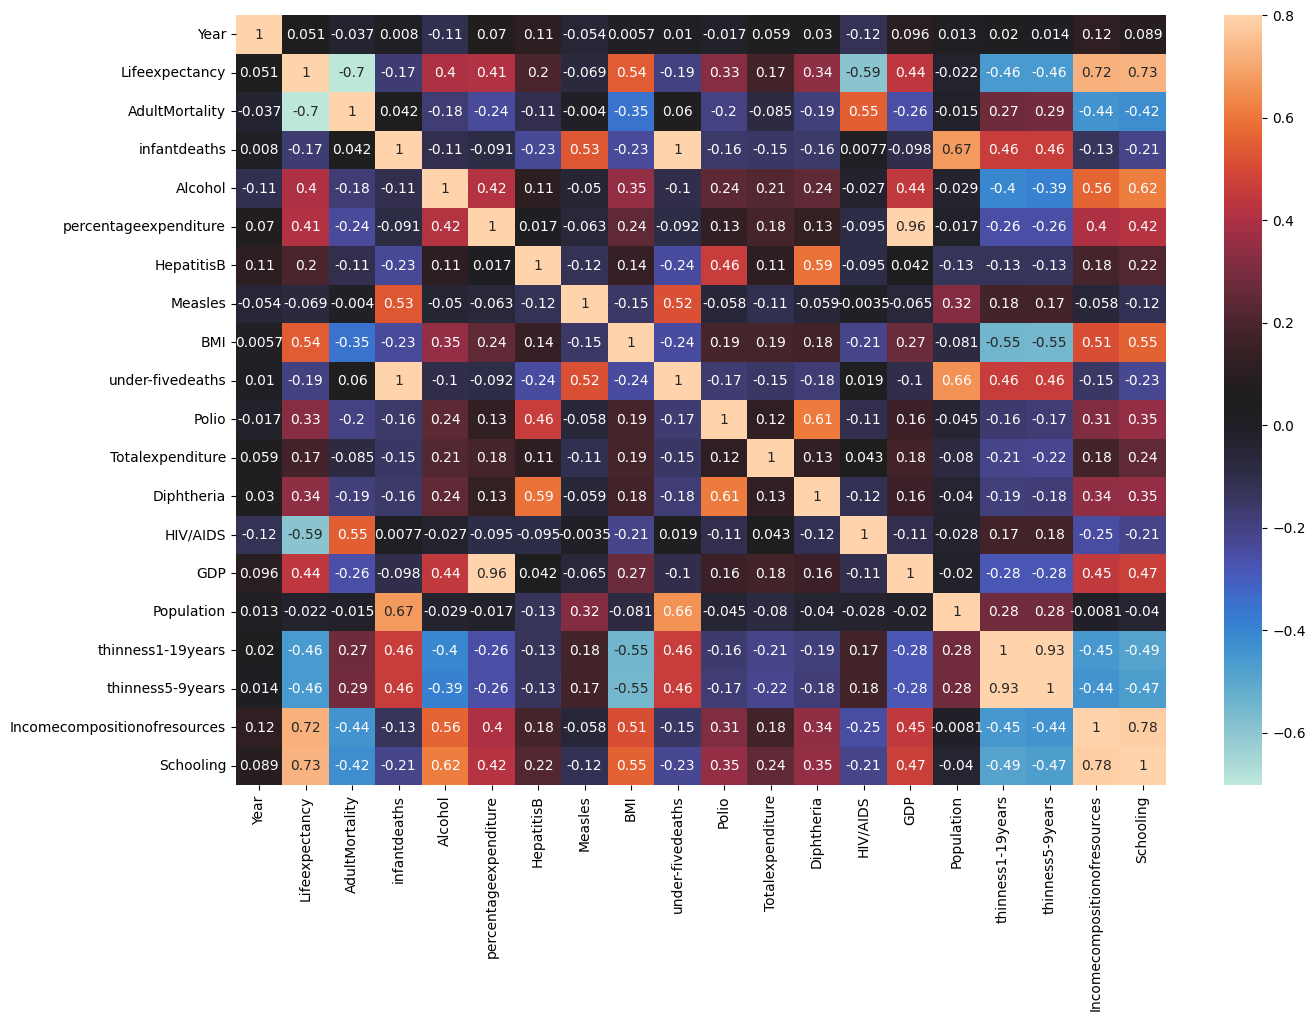

In [101]:
# plot matrix
plt.figure(figsize=(15,10))

sns.heatmap(
    corr,
    vmax=.8, 
    annot=True,
    cmap='icefire'
    )

plt.show()

## Prepare data

In [105]:
## your code goes here...
X = life_expectancy_df[["GDP", "HepatitisB"]].to_numpy().reshape(-1, 2)
y = life_expectancy_df.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



## Fit the model

In [107]:
## your code goes here...
lin_regressor = linear_model.LinearRegression()
lin_regressor

lin_regressor.fit(X_train, y_train)


LinearRegression()

## Test the model

* print R^2, MAE and MSE of predicted data.

In [108]:
## your code goes here...

life_expectancy_y_pred = lin_regressor.predict(X_test)

In [91]:
# The coefficient of determination: 1 is perfect prediction
print(f"Coefficient of determination: {r2_score(y_test, life_expectancy_y_pred)}")

Coefficient of determination: 0.25442439575187403


In [92]:
# The mean absolute error
print(f"Mean absolute error: {mean_absolute_error(y_test, life_expectancy_y_pred)}")

Mean absolute error: 1133735.2010802834


In [93]:
# The mean squared error
print(f"Mean squared error: {mean_squared_error(y_test, life_expectancy_y_pred)}")

Mean squared error: 466840230247134.4


In [109]:
prediction_results_df = pd.DataFrame({ 
    "X_GDP": X_test[:,0],
    "X_HepatitisB": X_test[:,1],
    "y_real": y_test,
    "y_pred": life_expectancy_y_pred,   
})

prediction_results_df.head()

ValueError: Per-column arrays must each be 1-dimensional